In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits

In [4]:
hdulist_goodspec = fits.open('../mastar-goodspec-v2_4_3-v1_0_2.fits') #Dataset containing spectr of stars
hdulist_allStars = fits.open('../mastarall-v2_4_3-v1_0_2.fits')

In [5]:
hdulist_goodspec.info()  #This command shows the tables contained in 'mastar-goodspec'
# hdulist_allStars.info()

Filename: ../mastar-goodspec-v2_4_3-v1_0_2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     63   8646R x 23C   [6A, 6A, 11A, J, 5A, J, D, D, D, D, 5E, J, I, E, E, I, 4563D, 4563E, 4563E, 4563E, 4563E, 4563J, J]   


In [56]:
hdulist_goodspec[1].header  #Info about the columns

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =               127872 /Number of bytes per row                         
NAXIS2  =                 8646 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   23 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [6]:
data_goodSpec = hdulist_goodspec[1].data
data_AllStar = hdulist_allStars[1].data
# a=pd.DataFrame(data_AllStar['MANGAID'])
# b=pd.DataFrame(data_goodSpec['MANGAID'])
# a

In [7]:
# pd.merge(a,b,how='outer')

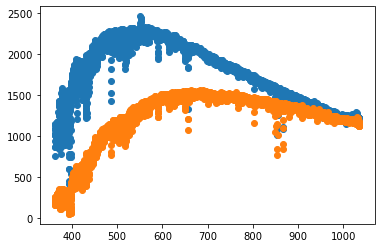

In [8]:
N=2   #Number of stars plotted (flux vs wavelength in nm)

for i in range(0,N):
    plt.scatter(data_goodSpec['WAVE'][i]/10,np.array(data_goodSpec['FLUX'])[i])   
#plt.legend(data['MANGAID'][0:N+1])



In [9]:
def index_max(array):
    return np.where(array== np.max(array))[0][0]

In [10]:
waveLenght = np.array([])
for i in range(len(data_goodSpec)):
    waveLenght = np.append(waveLenght, data_goodSpec['WAVE'][i][index_max(data_goodSpec['FLUX'][i])]/10**10)

In [11]:
WienConstant = 2.898*10**-3 # m*K
T = WienConstant/waveLenght

In [12]:
data_goodSpec['WAVE'][0]/10**-10

array([3.62159598e+13, 3.62242998e+13, 3.62326418e+13, ...,
       1.03490384e+14, 1.03514217e+14, 1.03538054e+14])

In [13]:
data_goodSpec['PSFMAG']

array([[-999.    ,   13.388 ,   12.751 ,   12.358 , -999.    ],
       [-999.    ,   14.382 ,   13.325 ,   12.819 , -999.    ],
       [-999.    ,   13.836 ,   12.647 , -999.    , -999.    ],
       ...,
       [-999.    ,   15.1291,   14.6054,   14.3672,   14.2424],
       [-999.    ,   15.1291,   14.6054,   14.3672,   14.2424],
       [-999.    ,   12.832 ,   11.905 ,   13.003 , -999.    ]],
      dtype=float32)

In [14]:
spectral_type = {'A': ['White',range(7500,10000)], 'F': ['Yellow', range(6000,7500)], 'G': ['Deep Yellow',range(5000,6000)],\
                        'K': ['Orange',range(3500,5000)], 'M':['Red',range(3500)] }